<a href="https://colab.research.google.com/github/Jayjake1/BikeSharingDemand/blob/main/ML_regression_team_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

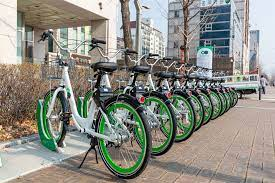

## <b> Problem Description </b>
### Public rental bike sharing system has been gaining popularity in the recent times.Currently,this system has been introduced in many major cities for enhancement of mobility comfort.It is also a great step towards environmental sustainability and social welfare.

###In order to run this system successfully,it is important to ensure that the rental bikes are available and accessible to the public at the right time,since this reduces the waiting time.Providing the city with a stable supply of rental bikes could become a serious challenge,eventually.Forecasting the number of bikes required at each hour can greatly help in ensuring that there's a stable supply of rental bikes.

### Our **objective** here,is to predict the Count of Rental bikes required on an hourly basis and to also identify the features which influences the hourly demand for Rental bikes.



# **Bringing in the data**

In [ ]:
#importing the required modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset
bd_df=pd.read_csv("/content/drive/MyDrive/Copy of SeoulBikeData.csv", encoding='ISO-8859-1')


In [ ]:
#inspecting the first 3 rows in the dataset
bd_df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Day,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,1,N
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,1,N
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,1,N


## <b> *Data Description* </b>

 This dataset contains information on Seoul city's weather conditions  (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall)and the number of bikes rented on every hour and the date information.


### <b>*Attribute Information:* </b>

*  *Date* :The date of each observation in the format '*year-month-day*'
*  *Rented Bike count* - Count of bikes rented at each hour
*  *Hour* - Hour of the day
*  *Temperature* - Temperature recorded in the city in *Celsius* (°C).
*  *Humidity* - Relative humidity in % 
*  *Windspeed* - Speed of the wind in *m/s*
*  *Visibility* - measure of distance at which object or light can be clearly discerned in units of  10*m* 
*  *Dew point temperature* - Temperature recorded in the beginning of the day in *Celsius*(°C).
*  *Solar radiation* - Intensity of sunlight in *MJ/m2*
*  *Rainfall* - Amount of rainfall received in *mm*
*  *Snowfall* - Amount of snowfall received in *cm*
*  *Seasons* - Season of the year (*Winter, Spring, Summer, Autumn*)
*  *Holiday* - Whether the day is a Holiday or not (*Holiday/No holiday*)
*  *Functional Day* -Whether the rental service is available (*Yes*-Functional hours) or not (*No*-Non functional hours)

In [ ]:
# This gives a comprehensive view about dataset
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec


* There are 8760 rows and 14 columns in the given data.
* None of the columns have missing values.
* Except for Date,the other columns have the correct datatypes.


In [ ]:
#displaying the names of columns in the dataframe
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#viewing the statistical summary of the data
bd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
#Checking for null values
bd_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

As we can see the above dataset dont have any null values. By this, we can say the dataset is balanced. 👆🏼


In [ ]:
#Checking for duplicate entries
bd_df[bd_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [ ]:
#Converting the datatype of Date column to datatime
 
bd_df['Date'] = pd.to_datetime(bd_df['Date'], format='%d/%m/%Y')

#Extracting Month,Weekday and Year from the date column
bd_df['Month']=bd_df['Date'].dt.month
bd_df['Days_of_week']=bd_df['Date'].dt.day_name()
bd_df['Year']=bd_df['Date'].dt.year
bd_df['Day']=bd_df['Date'].dt.day

In [ ]:
#The number of unique values in Date column
bd_df['Date'].nunique()

365

The dataset contains records of rented bikes per hour for a period of 365 days

In [ ]:
#The number of unique values in Year column
bd_df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

Most of the records are from the year 2018

In [ ]:
#Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bd_df['Weekend']=bd_df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [ ]:
#Displaying the unique values in the categorical columns
categorical_columns=['Seasons','Holiday', 'Functioning Day','Days_of_week','Weekend']

for col in categorical_columns:
  print(f'The unique values in the column {col} are {bd_df[col].unique()}')

The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


# **Exploratory Data Analysis**

# ***Univariate Analysis***

Let's see how some of the important numerical independent features are distibuted in our data.

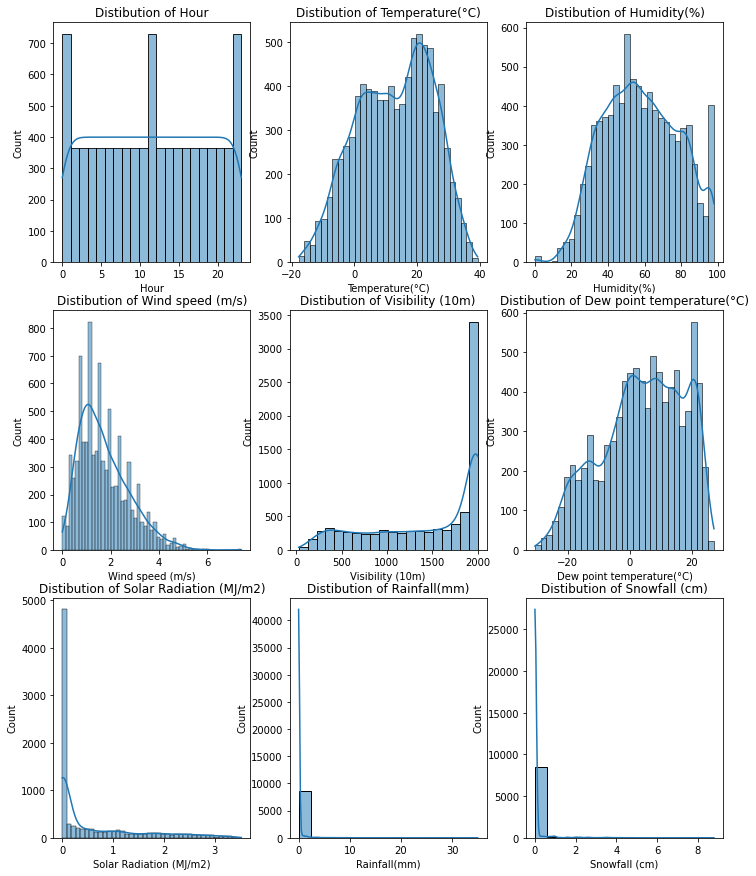

In [ ]:
fig = plt.figure(figsize=(12,15))
c=1
lis=['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for i in lis:
  plt.subplot(3,3, c)
  sns.histplot(bd_df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1

* Distribution of Temperature,Humidity,Dew point temperature are almost normal.
* Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed
* Visibility is negatively skewed

How is the dependent variable Rented Bike Count distributed?

Text(0.5, 1.0, 'Distibution of Rented Bike Count')

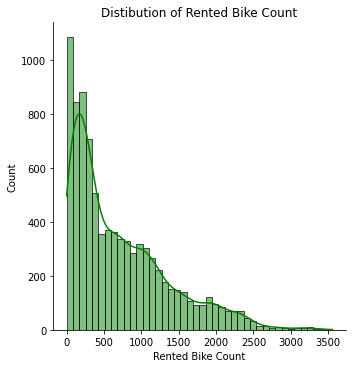

In [ ]:
sns.displot(bd_df['Rented Bike Count'],kde=True,color='g')
plt.title('Distibution of Rented Bike Count')

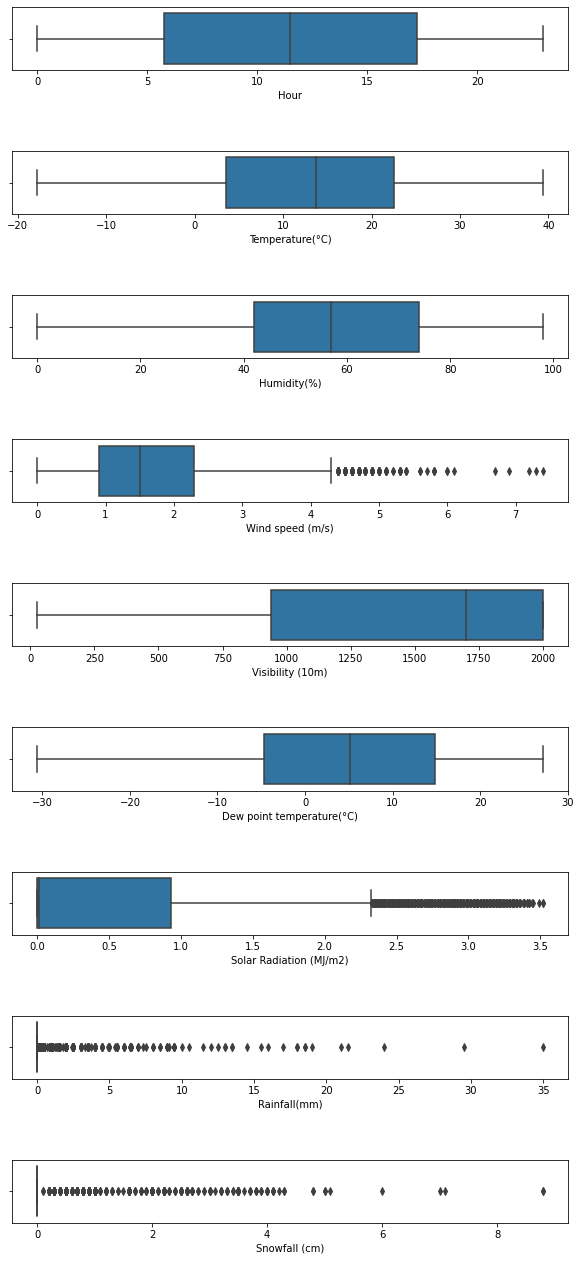

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in lis :
    plt.subplot(13,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=bd_df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

* The outlier values are not extreme,nor unusual.So,we retain these values in our dataset.

In [ ]:
len(categorical_columns)

## ***Basic Conclusions from Univariate Analysis***
- Hourly Bookings are mostly similar throughout the seasons(need to dig more for better understanding).
- More number of records on non-holiday(well working days😂) days & Functioning days of the rental service.
- Hourly bookings are fewers on Weekends
- Not much info from hour at the moment.
- The temperature is mostly >0, for now lets consider Seoul on the warmer side.
- Humidity is also moderate but still on warmer side.
- Wind speed is not that extreme.
- Most of the rainfall is <4 mm.
- Snowfall is mostly 0-1 cm and not that extreme in most cases.

# ***Bivariate Analysis***

## *Correlation heatmap*

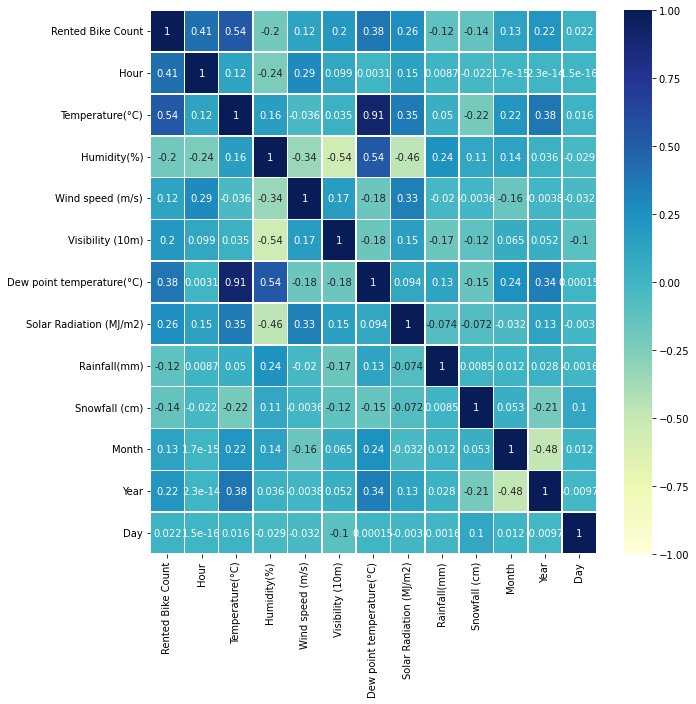

In [ ]:
#Correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(bd_df.corr(),annot=True,linewidth = 0.5, vmin=-1, vmax=1, cmap = 'YlGnBu')

* Dew point temperature is strongly correlated with temperature.
* Temperature,Hour shares a stronger correlation with Rented Bike count.


### Scatter plot showing the high correlation of Temperature and Dew point Temperature

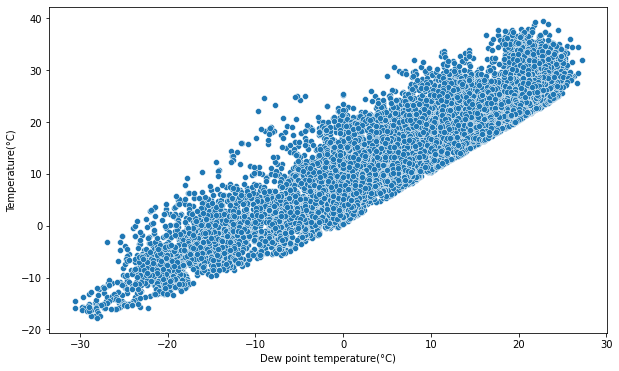

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(data=bd_df, y='Temperature(°C)', x='Dew point temperature(°C)')

##  *Were rental services offered on non-functional days?*

In [ ]:
len(bd_df[bd_df['Functioning Day']=='No'])

295

It is highly unlikely that services will be provided on non-functional days.But since there were few observations recorded on those days,let's check if there were any exceptional cases.

In [ ]:
 bd_df.groupby(['Functioning Day','Holiday']).agg(bikerentalcounts=('Rented Bike Count','sum'),no_of_holidays_nonholidays=('Date',lambda x: x.nunique()),no_of_records=(('Date','count')))

bikerentalcounts  ...  no_of_records
Functioning Day Holiday                       ...               
No              Holiday                    0  ...             24
                No Holiday                 0  ...            271
Yes             Holiday               215895  ...            408
                No Holiday           5956419  ...           8057

[4 rows x 3 columns]

* The rental service were functional on most days during the period from Dec 2017 to Nov 2018(only 13 non-functional days)
* Although,we've observed few records on Non-Functioning Day,rental services were not offered on those days(no exceptions) 


## *Which are the days on which the service was unavailable?*

In [ ]:
non_functioning_days =bd_df.loc[bd_df['Functioning Day']=='No']

#Holiday on which the rental service was unavailable
non_functioning_days.loc[non_functioning_days['Holiday']=='Holiday']['Date'].unique()

array(['2018-10-09T00:00:00.000000000'], dtype='datetime64[ns]')

Hangeul day is observed on October 9 in South Korea 
 Hangeul Day: It is a national Korean commemorative day marking the invention and the proclamation of Hangul , the alphabet of the Korean language

In [ ]:
non_functioning_days.loc[non_functioning_days['Holiday']=='No Holiday']['Date'].value_counts().to_frame(name = 'Hours_of_non_operation').reset_index().rename(columns={'index':'Date'})

,Date,Hours_of_non_operation
0,2018-04-11,24
1,2018-05-10,24
2,2018-09-18,24
3,2018-09-19,24
4,2018-09-28,24
5,2018-09-30,24
6,2018-10-02,24
7,2018-10-04,24
8,2018-11-03,24
9,2018-11-06,24



The services were not for available for 1 day in the month of April,1 day in May,4 days in September,3 days each in October and November.

##  *What is the likelihood of people renting bikes on holidays and non-holidays?*

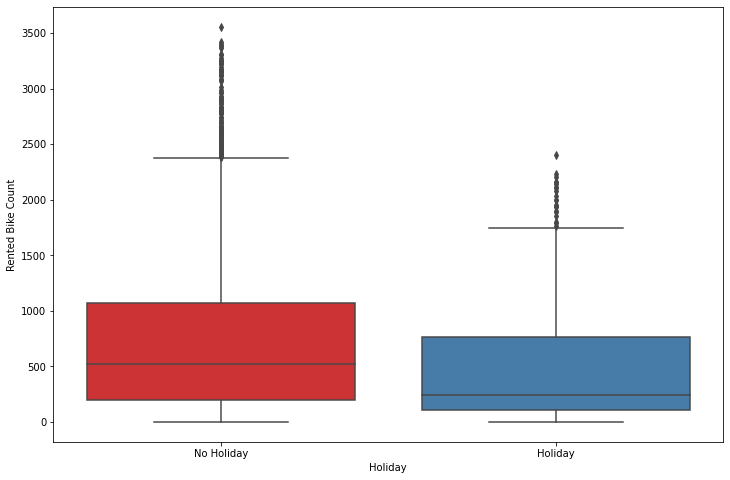

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bd_df,palette='Set1')

* On an average,the demand for rented bikes is higher on non-Holidays.

## *What is the count of rented bikes during different seasons  over the entire period of observation?*

In [ ]:
#Finding the total number of bikes rented in each season
season_df=bd_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()['Rented Bike Count'].to_frame(name = 'season_count').reset_index()

In [ ]:
#Finding the total number of bikes rented in each month
month_df=(bd_df.groupby(['Seasons','Month'])['Rented Bike Count'].sum()).to_frame(name = 'month_count').reset_index()

[None]

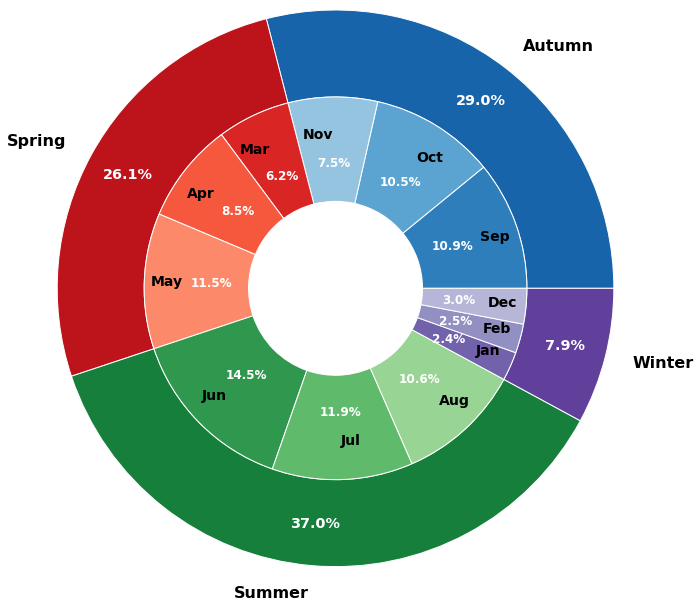

In [ ]:
import calendar
d = dict(enumerate(calendar.month_abbr))
subgroup_names = month_df['Month'].map(d)

fig, ax = plt.subplots()
size=1
group_names=['Autumn', 'Spring', 'Summer','Winter']
group_size=season_df['season_count']

subgroup_size=month_df['month_count']
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
outer_colors = [a(.8), b(.8),c(.8),d(.8)]
inner_colors = [*a(np.linspace(.7, .4, 3)),*b(np.linspace(.7, .4, 3)),*c(np.linspace(.7, .4, 3)),*d(np.linspace(.7, .4, 3))]

#Creating nested pie chart
patches, texts,pcts=ax.pie(group_size, radius=3.2, colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'),labels=group_names,autopct='%1.1f%%', textprops={'fontsize':16,'size': 'x-large'},labeldistance=1.1,pctdistance=0.85)
plt.setp(pcts, color='white',fontweight='bold')
plt.setp(texts, fontweight=600)

patches1, texts1,pcts1=ax.pie(subgroup_size, radius=3.2-size, colors=inner_colors,labels=subgroup_names,
       wedgeprops=dict(width=1.2, edgecolor='w'),autopct='%1.1f%%', textprops={'fontsize': 14},labeldistance=0.8,pctdistance=0.65)
plt.setp(pcts1, color='w', fontweight='bold',fontsize=12)
plt.setp(texts1, fontweight=600)

ax.set(aspect="equal")


* The demand for rental bikes is lowest during Winters(Dec-Feb),highest during Summers(June-August)

##  *What is the demand for rental bikes during different days of the week?*

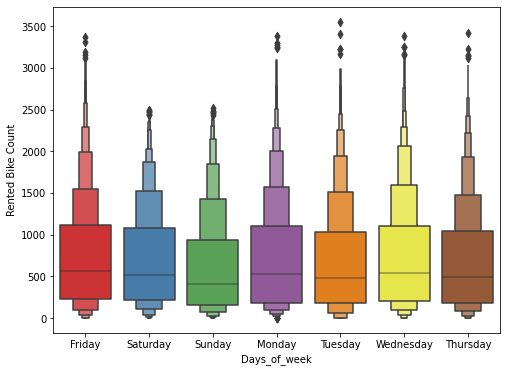

In [ ]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Days_of_week',y='Rented Bike Count',data=bd_df,palette='Set1')


* Least demand on Sunday,Slightly higher demand on Friday
* More demand on weekdays than weekends.

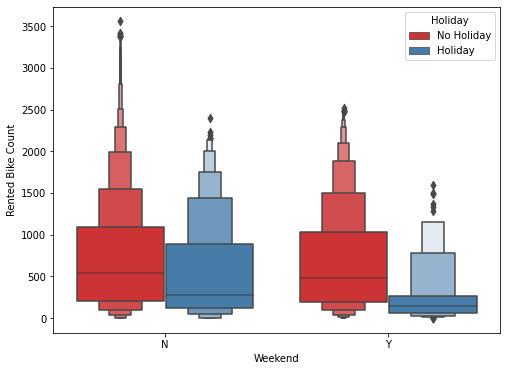

In [ ]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Weekend',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Holiday')

In [ ]:
bd_df.groupby(['Weekend'])['Rented Bike Count'].mean()

Weekend
N    719.448914
Y    667.342147
Name: Rented Bike Count, dtype: float64

* The average demand for rental bikes is lower on Weekends(Sat-Sun) as compared to Weekdays(Mon-Fri).

##  *What is the demand for rental bikes during different hours of the day?*

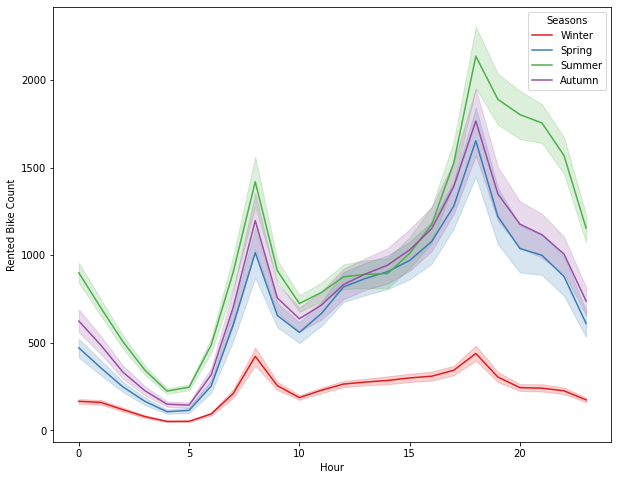

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=bd_df,palette='Set1',hue='Seasons',lw=1.5)

* The demand for rental bikes  peaks at 8 (8:00 am) and 18 (6:00 PM ).
* This peak in demand coincides with opening and closing hours of various institutions and offices.
* The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM
* The demand for bikes is least during the early hours (1:00 AM to 6:00 AM)
* Regardless,of the seasons,this has been the general trend noticed.

##  *What is the variation of  Rented bikes count over the entire period of observation?*

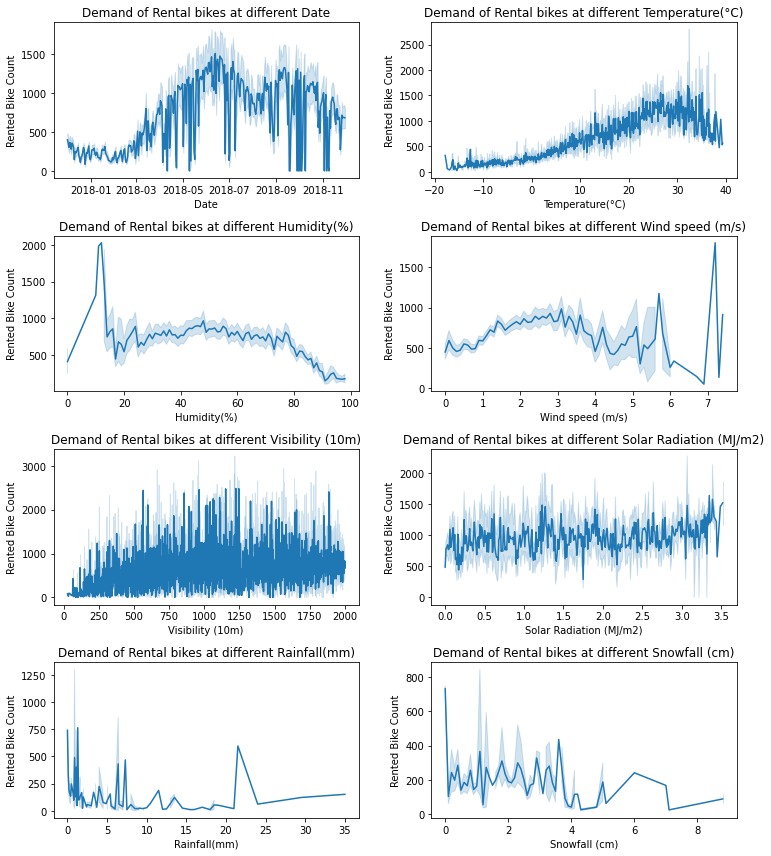

In [ ]:
fig = plt.figure(figsize=(11,12))
c=1
cont = ['Date','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for i in cont:
  plt.subplot(4,2,c)
  sns.lineplot(x=i,y='Rented Bike Count',data=bd_df,palette='Grouped')
  plt.title('Demand of Rental bikes at different {}'.format(i))
  c = c + 1
plt.tight_layout()


## *The peak between 20 and 25 seems out of place, but on refering to the dataset we find it to be normal.*

In [ ]:
bd_df[(bd_df['Rainfall(mm)'] >=21) & (bd_df['Rainfall(mm)'] <=24)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday,Year,Day,Weekend
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,Thursday,2018,28,N
5132,2018-07-02,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,7,Monday,2018,2,N
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,Wednesday,2018,29,N


## *What are the factors which influence the demand for rental bikes during a day?*

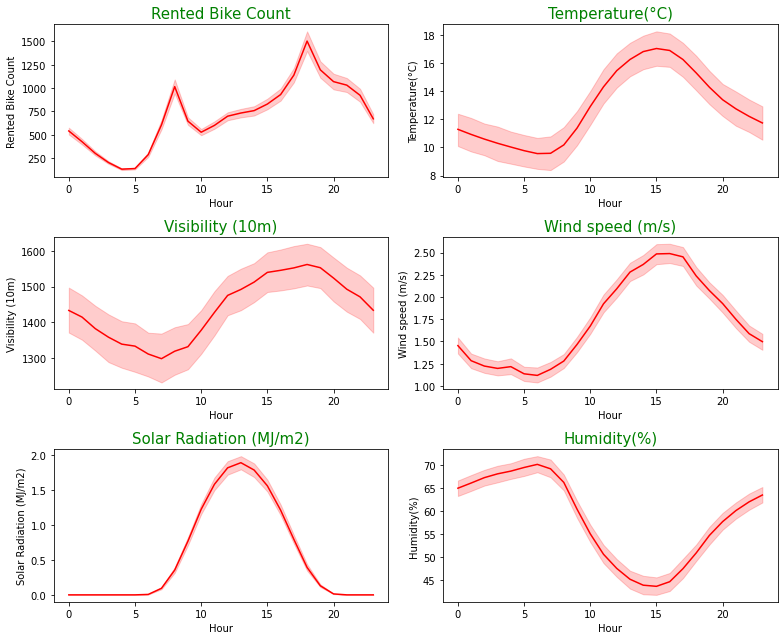

In [ ]:

fig = plt.figure(figsize=(11,9))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

* Temperature, visibility, windspeed, and humidity appear to be positively associated to the hourly demand for rental bikes. 
* The rented bike counts are highest during the hours from 15.00(3:00 PM) to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.

## *What are the factors which influence the demand for rental bikes during the recorded period(From Dec 2017-Nov 2018)?*

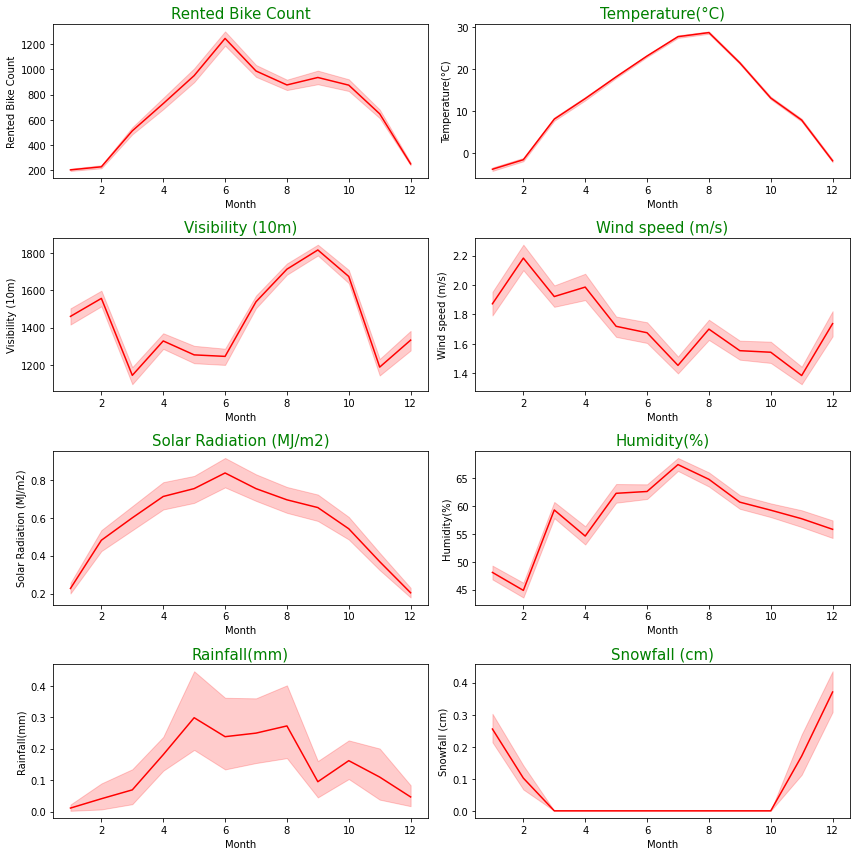

In [ ]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bd_df, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()  

* The monthly count of rented bikes is positively associated with Temperature. 
* Snowfall movement coincides with season, with heavy snowfall from December to February throughout the winter season. There's a decline in count of rented bikes during these months.
* Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.


## *What are the factors which influence the demand for rental bikes during various seasons of the year?*

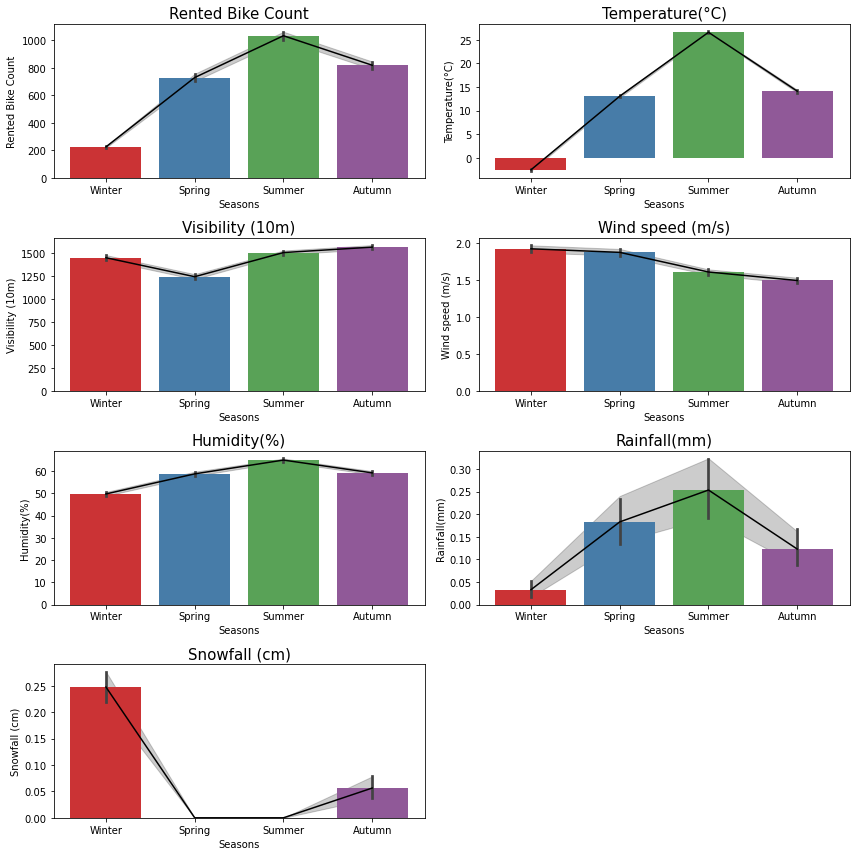

In [ ]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bd_df, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bd_df, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

* It is evident that the seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received. 
* Therefore,the demand is highest during Summer season and least during winters



## **Basic Conclusions from Bivariate Analysis**

* Temperature and Hour have a strong correlation with the count of rented bikes.
* Dew point temperature is highly positively correlated to the Temperature.
* During the period from Dec 2017 to Nov 2018,bike rental facilities were available on most days.The service was unavailable only for 13 days.
* The demand for rental bikes is higher on Regular days(Non-Holidays) .
* There is more demand for rental bikes on Weekdays than on Weekends.
* The peak demands for rental bikes occur on the opening (8-9 AM) and closing times (6-7pm) of offices and institutions.
* There is a significant drop in the number of rented bikes during Winters(Dec-Feb) because it's freezing cold!
* The demand for bikes increases during warmer temperatures,which is why there's maximum count of rented bikes during the Summer season.



---

# ***Feature Engineering***

In [ ]:
#Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''

  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)                          

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Weekday', 'Year', 'Day',
       'Weekend'],
      dtype='object')

In [ ]:
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


Multicolinearity causes reduction in the statistical power of your regression model

Let's check the values of vif if we exclude Dew point temperature and Year.

In [ ]:
check_vif(bd_df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


The VIF of the features,now lie within the acceptable range.

In [ ]:
#Dropping 'Dew point temperature(°C)','Year' to reduce the VIF
bd_df.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)

In [ ]:
#Creating a copy of the main dataframe 'bd_df'
df=bd_df.copy()

In [ ]:
#Creating dummies for the Categorical columns
df = pd.get_dummies(bd_df, columns = ['Seasons','Holiday','Weekend','Functioning Day'],drop_first=True)
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Days_of_week,Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Weekend_Y,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,Friday,1,0,0,1,1,0,1


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Days_of_week', 'Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Weekend_Y', 'Functioning Day_Yes'],
      dtype='object')

In [ ]:
#Dropping the columns Date and Days_of_week
df.drop(['Days_of_week','Date'],axis=1,inplace=True)

In [ ]:
#Displaying the columns present in the dataframe 'df'
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Weekend_Y',
       'Functioning Day_Yes'],
      dtype='object')



---


# ***Implementation of Regression models*** 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
#Defining independent and dependent variables

y = df['Rented Bike Count']
X = df.drop('Rented Bike Count',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(8760, 16)

In [ ]:
X_train.shape

(6132, 16)

In [ ]:
X_test.shape

(2628, 16)

In [ ]:
#Creating functions to calculate the Evaluation metrics for the regression models

def evaluate_model(name,X_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating 
  the perfomance of Regression models
  '''
  list_=[]
  #calculating mean absolute error 
  MAE =  mean_absolute_error(y_true,y_pred)
  print(f'MAE : {MAE}')
    
  #finding mean_squared_error
  MSE  = mean_squared_error(y_true,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
 
  #finding the r2 score
  r2 = r2_score(y_true,y_pred)
  print("R2 :" ,r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_true,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  list_.extend([name,MAE,MSE,RMSE,r2,adj_r2])
  return(list_)
  

In [ ]:
#Creating a  list which would store lists of different models and their performance metrics
list_of_models=[]

# ***1. Linear Regression***

* **Simple Linear Regression**

In [ ]:
#Scaling the features 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
#Importing the Linear Regression model and maths module
from sklearn.linear_model import LinearRegression
import math

In [ ]:
#Fitting the data to Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the values of y from X_test
y_pred= regressor.predict(X_test)

In [ ]:
#Evaluating the model
list_of_models.append(evaluate_model('Simple Linear Regression',X_test,y_test,y_pred))

MAE : 327.66578987433144
MSE : 188770.6925362117
RMSE : 434.4774937050384
R2 : 0.5393478523845607
Adjusted R2 :  0.5365250127208889


* **Lasso Regression with Hyper-parameter Tuning**

In [ ]:
#importing the classes required for Cross Validation 
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gsv

In [ ]:
#importing the linear_model class from sklearn library
from sklearn import linear_model
#Creating a Lasso Linear model object
clf = linear_model.Lasso()

In [ ]:
#Creating the parameter grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005,)
grid['max_iter'] = [25,50,100,500,1000]

In [ ]:
#performing GridSearch CV
clf=gsv(estimator=clf, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
#displaying the best estimators and score
print(clf.best_estimator_,'The best score is ',clf.best_score_)

Lasso(alpha=0.23500000000000001, max_iter=25) The best score is  0.5559063428609836


In [ ]:
#Creating a Lasso object with optimal values of parameters
clf2 = linear_model.Lasso(alpha=0.235, max_iter=25)

In [ ]:
#Fitting the train data to optimal Lasso regularized model
clf2.fit(X_train,y_train)

#Predicitng the values for y from X_test
y_pred=clf2.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+07, tolerance: 2.567e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#Evaluating the model
list_of_models.append(evaluate_model('Lasso Regression',X_test,y_test,y_pred))

MAE : 327.5787900127513
MSE : 188737.802790525
RMSE : 434.4396422870788
R2 : 0.5394281123644419
Adjusted R2 :  0.5366057645275331


* **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge=Ridge()

In [ ]:
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred=ridge.predict(X_test)

In [ ]:
#Evaluating the model
list_of_models.append(evaluate_model('Simple Ridge Regression',X_test,y_test,y_pred))

MAE : 327.6571716863428
MSE : 188767.25013472006
RMSE : 434.473532145193
R2 : 0.5393562527862268
Adjusted R2 :  0.5365334645995472


* **Ridge Regression with Hyper-Parameter Tuning**

In [ ]:
clf = linear_model.Ridge()

In [ ]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
grid['max_iter'] = [25,50,100,500,1000]

In [ ]:
clf=gsv(estimator=clf, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [ ]:
print(clf.best_estimator_,clf.best_score_)

Ridge(alpha=0.99, max_iter=25) 0.5558996715035691


In [ ]:
model = linear_model.Ridge(alpha=0.99, max_iter=25)

In [ ]:
model.fit(X_train,y_train)

Ridge(alpha=0.99, max_iter=25)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Evaluating the model
list_of_models.append(evaluate_model('Tuned Ridge Regression',X_test,y_test,y_pred))

MAE : 327.6572569401641
MSE : 188767.28434304488
RMSE : 434.47357151275025
R2 : 0.5393561693085529
Adjusted R2 :  0.5365333806103287


# ***Polynomial Regression***

In [ ]:
#importing the packages required for preprocessing,creating pipelinen,cross-validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
def PolynomialRegression(degree=1, **kwargs):#initializing the degree as 1,however the degree will change during cross-validation
  '''
  This function transforms the independent features(X_train) to a polynomial of the degree given in the parameters 
  and performs Linear regression using the  y_train(not-transformed) and the transformed X_train.
  '''
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
parameters = {'polynomialfeatures__degree': [2,3,4,5]}
poly_regressor = PolynomialRegression()
poly_grid = GridSearchCV(poly_regressor, param_grid=parameters,cv=3, scoring='neg_mean_squared_error', verbose=3) 
poly_grid.fit(X_train, y_train)



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END polynomialfeatures__degree=2;, score=-120356.762 total time=   0.2s
[CV 2/3] END polynomialfeatures__degree=2;, score=-110798.874 total time=   0.1s
[CV 3/3] END polynomialfeatures__degree=2;, score=-117620.273 total time=   0.1s
[CV 1/3] END polynomialfeatures__degree=3;, score=-10234528998259683229696.000 total time=   0.9s
[CV 2/3] END polynomialfeatures__degree=3;, score=-499549607286796517376.000 total time=   0.8s
[CV 3/3] END polynomialfeatures__degree=3;, score=-454362014189122158592.000 total time=   0.8s
[CV 1/3] END polynomialfeatures__degree=4;, score=-6721112848952934797410304.000 total time=  36.4s
[CV 2/3] END polynomialfeatures__degree=4;, score=-1076815252260868608491520.000 total time=  37.6s
[CV 3/3] END polynomialfeatures__degree=4;, score=-8746585032438365256941568.000 total time=  37.8s
[CV 1/3] END polynomialfeatures__degree=5;, score=-108033940017.308 total time= 1.1min
[CV 2/3] END polynom

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n",poly_grid.best_params_)


 The best parameters across ALL searched params:
 {'polynomialfeatures__degree': 2}


In [ ]:
#Fitting the independent features to a polynomial of degree 2
poly_features = PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform(X_train)

#Performing Linear regression using  y_train and thetransformed X_train 
poly_regressor = LinearRegression( )
poly_regressor.fit(X_train_poly, y_train)

#Predicting the y values from X_test

X_test_transform=poly_features.transform(X_test)
y_pred=poly_regressor.predict(X_test_transform)

In [ ]:
#Determining the evaluation metrics of the model
print(f'The polynomial with degree = 2 is optimal fit')
list_of_models.append(evaluate_model('Tuned Polynomial Regression',X_test,y_test,y_pred))

The polynomial with degree = 2 is optimal fit
MAE : 241.6755850456621
MSE : 134304.47143591847
RMSE : 366.4757446761224
R2 : 0.6722603367604627
Adjusted R2 :  0.6702519742128439


# **Random Forest Regressor**

In [ ]:
#Splitting the data to train and test again(to obtain non-scaled test and train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# rfr model
rfr = RandomForestRegressor()

# hyper parameter tuning using gridSearchCV
parameters = {'max_depth': [50, 60, 70],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              'n_estimators':[100, 150, 200]
              }

result = GridSearchCV(rfr, parameters, scoring='r2', cv=5)
result.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
# best parameters.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}, n_estimators={}'.format(result.best_params_['max_depth'],
                                    result.best_params_['min_samples_split'], result.best_params_['min_samples_leaf'], result.best_params_['n_estimators']))
# result.best_params_

Best parameters for our model are: max_depth=50, min_samples_split=2, min_samples_leaf=1, n_estimators=200


In [ ]:
# train and test performance
train_score = result.best_score_
test_score = result.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.9245046134796933
The best r2 score for test data is 0.9228691697566048


In [ ]:
best_rfr = RandomForestRegressor(max_depth=50, min_samples_split=2, min_samples_leaf=1, n_estimators=200)

In [ ]:
best_rfr.fit(X_train,y_train)
y_pred=best_rfr.predict(X_test)

In [ ]:
#Evaluating the model
list_of_models.append(evaluate_model('Tuned Random Forest Regression',X_test,y_test,y_pred))

MAE : 102.48355213089803
MSE : 31540.782705146503
RMSE : 177.59724858551863
R2 : 0.9230318589427726
Adjusted R2 :  0.9225602043058843


In [ ]:
# making function to plot important features.
def plotting_imp_features(rfr_model, training_data):
  imp_features = rfr_model.feature_importances_
  feature_names = training_data.columns
  rfr_imp_features = pd.Series(imp_features, index=feature_names)
  return rfr_imp_features.sort_values(ascending=False).plot(kind='bar',figsize=[10,6], title='Feature Importance')

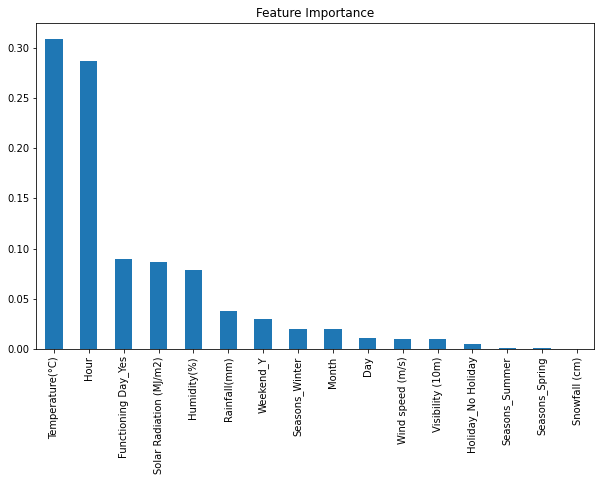

In [ ]:
plotting_imp_features(result.best_estimator_, X_train)

# **XGBoost Regressor**

In [ ]:
#importing the required packages and classes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

* **XGBoost with default parameters**

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

[05:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 168.22618599456013
MSE: 66671.41259656809
RMSE: 258.2080800373375
R2 Score: 0.8373035083755248
------------------------------
[05:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 361.87913708074166


- **Xgboost with Hyperparameter Tuning**

In [ ]:
xgb_1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb_1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.9361493231685643
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_2 = XGBRegressor()
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.9375103962305379
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_3 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}
for i in [2,3,4,5,6]:
  xgb_grid = GridSearchCV(xgb_3,
                        parameters,
                        cv = i,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 6 folds for each of 48 candidates, totalling 288 fits
0.9484794120028236
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [ ]:
xgb_4 = XGBRegressor(n_estimators=1000, learning_rate=0.01,subsample=0.7,objective='reg:squarederror',max_depth = 7)
xgb_4.fit(X_train, y_train)
predictions = xgb_4.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 88.61121962699171
MSE: 24400.423683869987
RMSE: 156.2063496912657
R2 Score: 0.9404562889414353
------------------------------
[06:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE Cross-Validation: 361.87913708074166


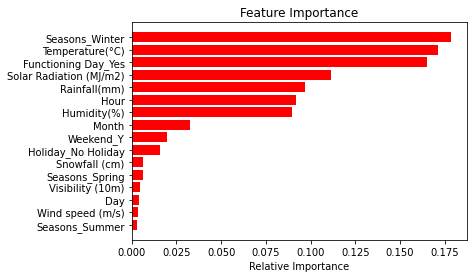

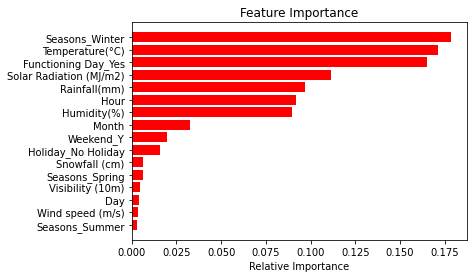

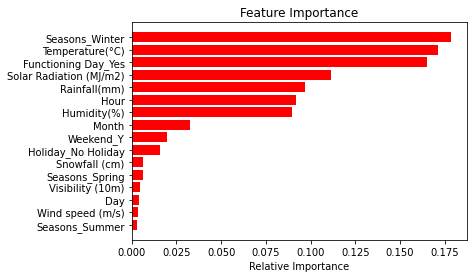

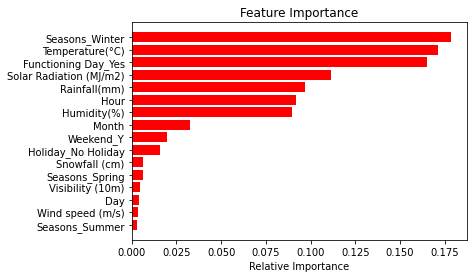

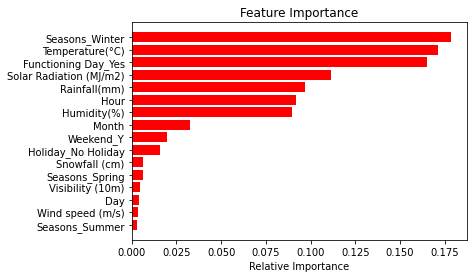

In [ ]:
for i in [xgb,xgb_1,xgb_2,xgb_3,xgb_4]:
  features = X_train.columns
  importances = xgb.feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

# **CatBoost Regressor**

In [ ]:
#installing CatBoost package
!pip install catboost

     |████████████████████████████████| 76.1 MB 61 kB/s 


In [ ]:
#Importing the Catboost Regressor class
from catboost import CatBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Displaying the list of columns in the main data frame
bd_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Weekday', 'Day', 'Weekend'],
      dtype='object')

In [ ]:
X=bd_df.drop(columns=['Date','Rented Bike Count','Weekday'])
y=bd_df['Rented Bike Count']

In [ ]:
#List of categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categorical_columns)
#Get location of categorical columns
categorical_features_indices = [X.columns.get_loc(col) for col in categorical_columns]
print("Location of categorical columns : ",categorical_features_indices)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day', 'Weekend']
Location of categorical columns :  [8, 9, 10, 13]


In [ ]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Finding the optimal parameters by Grid Search Cross Validation
parameters = {'depth' : [8,10,6],'learning_rate' : [0.01, 0.05, 0.1],'iterations':[50,100,150]}
CB_regressor = CatBoostRegressor(iterations=50, loss_function='RMSE',cat_features=categorical_features_indices)
grid = GridSearchCV(estimator=CB_regressor, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 603.7269700	total: 68.3ms	remaining: 10.2s
1:	learn: 566.5966709	total: 86.8ms	remaining: 6.42s
2:	learn: 533.2843408	total: 104ms	remaining: 5.1s
3:	learn: 502.0230744	total: 121ms	remaining: 4.41s
4:	learn: 472.7778642	total: 137ms	remaining: 3.98s
5:	learn: 447.0217558	total: 155ms	remaining: 3.71s
6:	learn: 424.8788465	total: 171ms	remaining: 3.5s
7:	learn: 406.4956688	total: 188ms	remaining: 3.33s
8:	learn: 389.4848940	total: 204ms	remaining: 3.2s
9:	learn: 370.6614178	total: 221ms	remaining: 3.1s
10:	learn: 355.8817499	total: 248ms	remaining: 3.14s
11:	learn: 340.9776774	total: 270ms	remaining: 3.1s
12:	learn: 328.4280022	total: 290ms	remaining: 3.06s
13:	learn: 317.2457413	total: 306ms	remaining: 2.98s
14:	learn: 309.5390301	total: 325ms	remaining: 2.92s
15:	learn: 298.1573003	total: 342ms	remaining: 2.86s
16:	learn: 288.9753198	total: 360ms	remaining: 2.81s
17:	learn: 281.4715502	total: 383ms	remaining: 2.81s
18:	learn: 273.9371179	total: 401ms	remaining: 2.77s
19:	le

In [ ]:
# creating Catboost model
CB_regressor= CatBoostRegressor(iterations=150,depth=10,learning_rate=0.1, loss_function='RMSE')

 # train the model
CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [ ]:
#Make predictions and evaluation of Catboost model

print(f'Training score:{CB_regressor.score(X_train,y_train)}')

y_pred=CB_regressor.predict(X_test)

#Evaluating the model
list_of_models.append(evaluate_model('Tuned Catboost Regression',X_test,y_test,y_pred))


Training score:0.9685119368209548
MAE : 93.03248380292574
MSE : 22751.65500624899
RMSE : 150.83651748250153
R2 : 0.945251274987267
Adjusted R2 :  0.9449579408310564


Text(0, 0.5, 'Feature name')

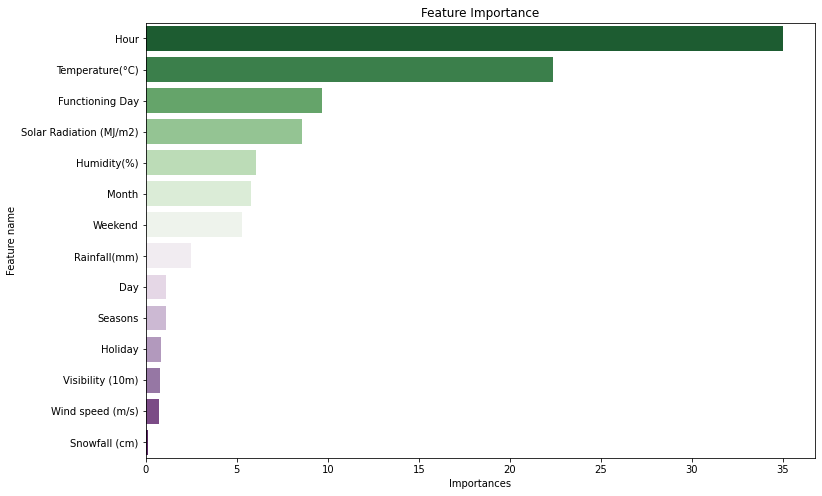

In [ ]:
# Create a dataframe of feature importance 
feature_imp = pd.DataFrame(CB_regressor.get_feature_importance(prettified=True))

#Visualizing features importance of catboost model
plt.figure(figsize=(12, 8))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=feature_imp,palette="PRGn_r");
plt.title('Feature Importance')
plt.ylabel('Feature name')

In [ ]:
#Comparing models
Comparison_df=pd.DataFrame(list_of_models,columns=['Regression Model','Mean Absolute Error','Mean Sqaured Error','Root Mean Squared Error','r2 score','adjusted r2 score'])
Comparison_df

,Regression Model,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,r2 score,adjusted r2 score
0,Simple Linear Regression,327.66579,188770.692536,434.477494,0.539348,0.536525
1,Lasso Regression,327.57879,188737.802791,434.439642,0.539428,0.536606



# **Conclusion**

* Evaluating the performance metrics of the models has brought us to a conclusion that tree based ensemble models like XGBoost and CatBoost models are the most suitable for Predicting Bike Count the number of bikes required on an hourly basis.

* The important features for prediction are : Hour &Temperature.

* Due to the lack of significant linear correlation between the independent variables and the count of Rented bikes,Linear regression and Polynomial regression are not good fit in this scenario.

*

*

*

# **References**

* Towards Data Science
* Stack Overflow
* Analytics Vidhya
* Machine Learning Mastery